#### Downlad the data

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans 

In [23]:

data=pd.read_csv(r"C:\Users\dathr\Downloads\Iris.csv")

#### Show the first five rows of data


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Count the different number of species available

In [4]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Visualize the species using bar plot

<BarContainer object of 150 artists>

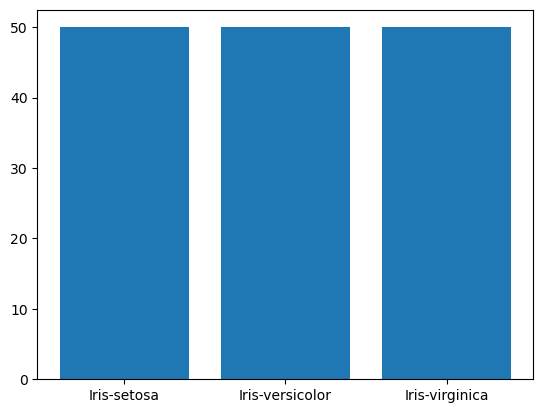

In [5]:
import matplotlib.pyplot as plt
plt.bar(data['Species'],height=data['Species'].value_counts()[0])

### Converting the data into an array form droping the species column

In [6]:
data1=data.drop(columns=['Species'])
data1=data1.values

In [7]:
data1

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

### Selecting the number of optimum clusters. We can use the help of elbow plot 

C:\Users\dathr\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1


C:\Users\dathr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'The elbow method')

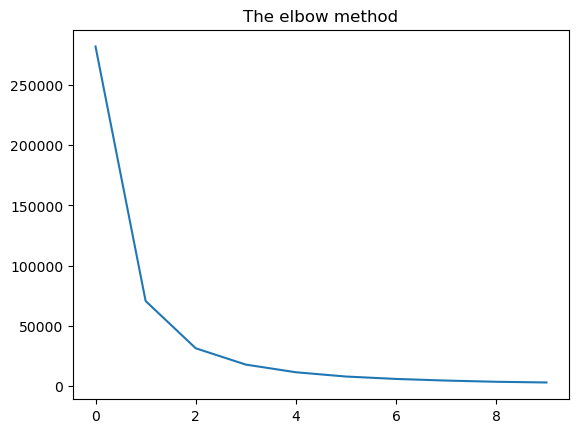

In [8]:

s=[]
for i in range(1,11):
    print(i)
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(data1)
    s.append(Kmeans.inertia_)
plt.plot(s)
plt.title("The elbow method")

In [18]:
pip install threadpoolctl==3.1.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


### From the elbow method we can see that after the third cluster the line became almost constant so the ideal number of clusters is 3

In [9]:
Kmeans=KMeans(n_clusters=3)
s=Kmeans.fit_predict(data1)

#### Find the cluster centres

In [10]:
k_means_cluster_centers = Kmeans.cluster_centers_
k_means_cluster_centers

array([[ 25.        ,   5.00612245,   3.42040816,   1.46530612,
          0.24489796],
       [125.        ,   6.57058824,   2.97058824,   5.52352941,
          2.01176471],
       [ 74.5       ,   5.922     ,   2.78      ,   4.206     ,
          1.304     ]])

In [13]:
s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### For visualizing the clusters plot the graph between any 2 columns I took 1st and 2nd columns

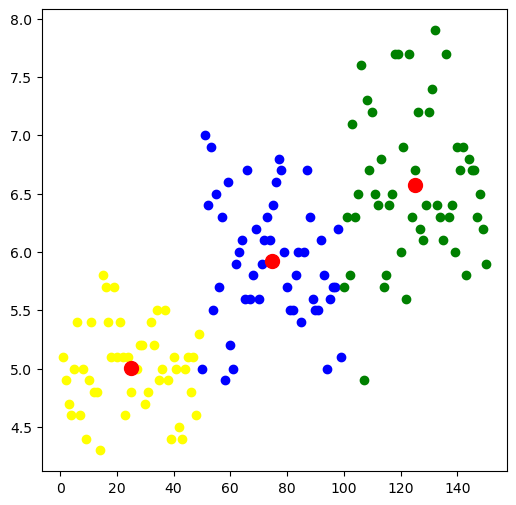

In [11]:
plt.figure(figsize=[6,6])
plt.scatter(data1[s==2,0],data1[s==2,1],color='Blue')
plt.scatter(data1[s==1,0],data1[s==1,1],color='Green')
plt.scatter(data1[s==0,0],data1[s==0,1],color='Yellow')
plt.scatter(k_means_cluster_centers[0,0],k_means_cluster_centers[0,1],color="Red",s=100)
plt.scatter(k_means_cluster_centers[1,0],k_means_cluster_centers[1,1],color="Red",s=100)
plt.scatter(k_means_cluster_centers[2,0],k_means_cluster_centers[2,1],color="Red",s=100)
plt.show()

#### We can also take another columns such as 1st and 3rd columns

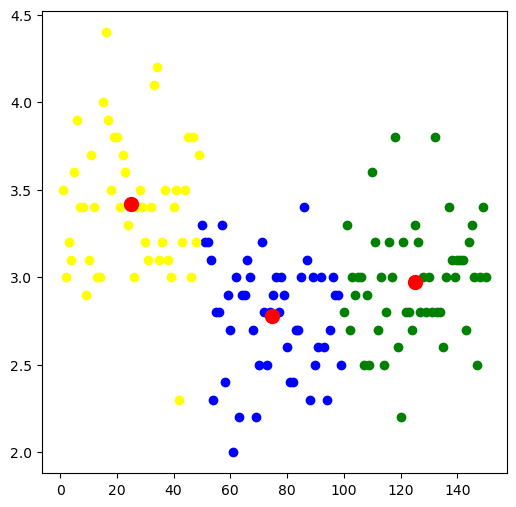

In [12]:
plt.figure(figsize=[6,6])
plt.scatter(data1[s==2,0],data1[s==2,2],color='Blue')
plt.scatter(data1[s==1,0],data1[s==1,2],color='Green')
plt.scatter(data1[s==0,0],data1[s==0,2],color='Yellow')
plt.scatter(k_means_cluster_centers[0,0],k_means_cluster_centers[0,2],color="Red",s=100)
plt.scatter(k_means_cluster_centers[1,0],k_means_cluster_centers[1,2],color="Red",s=100)
plt.scatter(k_means_cluster_centers[2,0],k_means_cluster_centers[2,2],color="Red",s=100)
plt.show()

### Therefore the clusters are represented visually

In [24]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


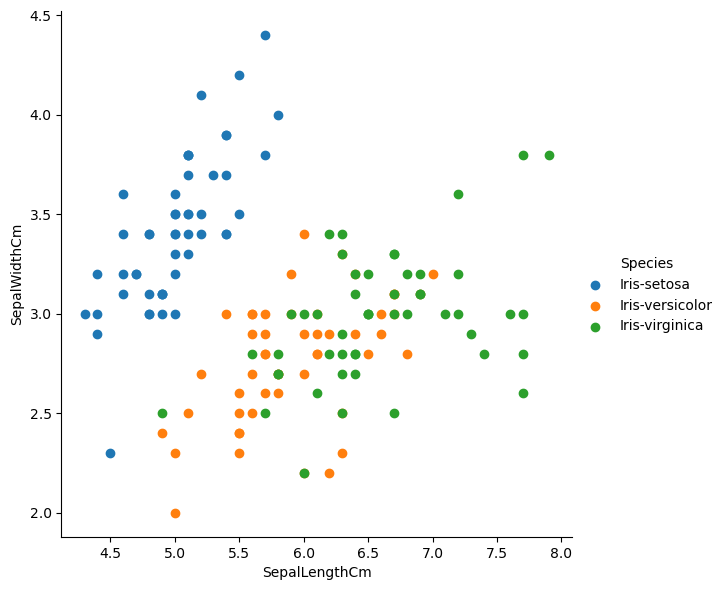

In [25]:
# Create a scatter plot with sepal length and width
sns.FacetGrid(data, hue="Species", height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

In [26]:
# Combine Versicolor and Virginica into Class4
data.loc[data['Species'] != 'Iris-setosa', 'Species'] = 'Class4'
data.loc[data['Species'] == 'Iris-setosa', 'Species'] = 'Class3'

In [27]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Class3
1,2,4.9,3.0,1.4,0.2,Class3
2,3,4.7,3.2,1.3,0.2,Class3
3,4,4.6,3.1,1.5,0.2,Class3
4,5,5.0,3.6,1.4,0.2,Class3
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Class4
146,147,6.3,2.5,5.0,1.9,Class4
147,148,6.5,3.0,5.2,2.0,Class4
148,149,6.2,3.4,5.4,2.3,Class4


LogisticRegression Accuracy: 1.00


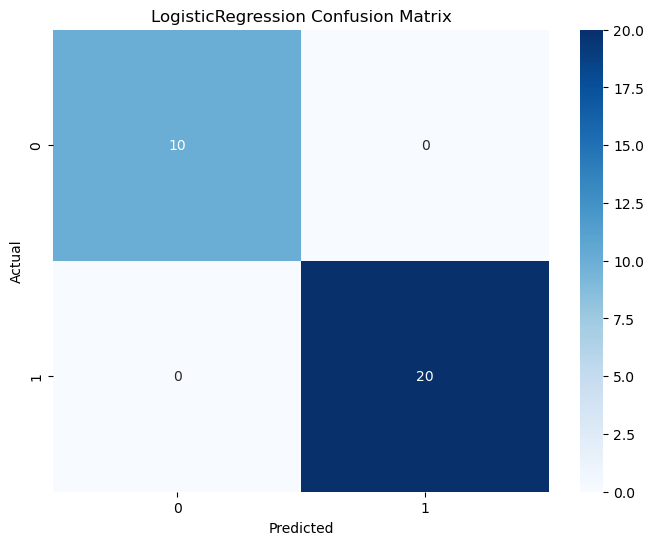

RandomForestClassifier Accuracy: 1.00


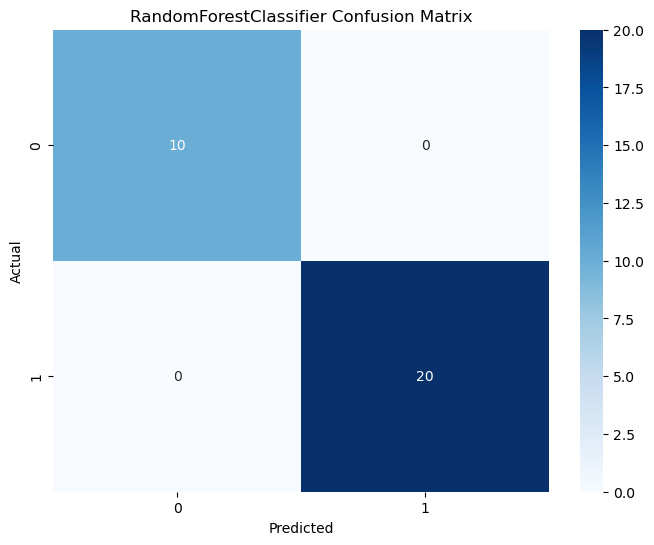

SVC Accuracy: 1.00


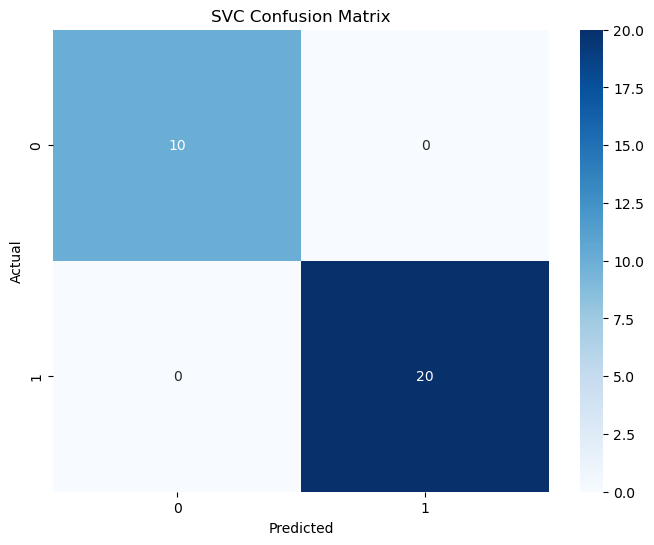

In [28]:
# Separate features and target
X = data.drop('Species', axis=1)
y = data['Species']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classification algorithms
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC()
]

# Train and evaluate each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf.__class__.__name__} Accuracy: {accuracy:.2f}")
    # Plot confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f"{clf.__class__.__name__} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()